In [66]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression


In [67]:
#Download our dataset
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"

travel = pd.read_csv(file_name)
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [68]:
# Get base information on our dataset
print("Rows     : ", travel.shape[0])
print ("Columns  : " , travel.shape[1])
print ("\nFeatures : \n" ,travel.columns.tolist())
print ("\nMissing values :  ", travel.isnull().sum().values.sum())
print ("\nUnique values :  \n", travel.nunique())

Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :   36329

Unique values :  
 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co     

In [69]:
# Get statistics for our Numerical Columns
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [70]:
#Find where missing values are located
travel.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

array([[<AxesSubplot:title={'center':'channel'}>,
        <AxesSubplot:title={'center':'is_booking'}>,
        <AxesSubplot:title={'center':'is_mobile'}>],
       [<AxesSubplot:title={'center':'orig_destination_distance'}>,
        <AxesSubplot:title={'center':'srch_rm_cnt'}>,
        <AxesSubplot:title={'center':'srch_adults_cnt'}>],
       [<AxesSubplot:title={'center':'srch_children_cnt'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

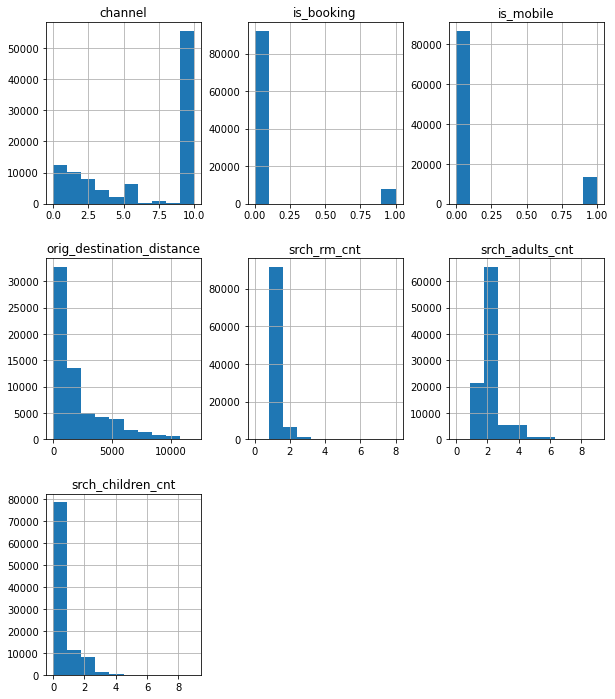

In [71]:
# Plot some of the data
travel[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10, 12))

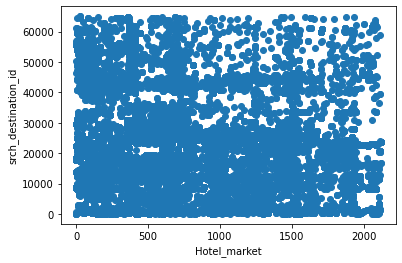

In [72]:
plt.scatter(x = travel['hotel_market'], y = travel['srch_destination_id'])
plt.xlabel('Hotel_market')
plt.ylabel('srch_destination_id')
plt.show()

a) by "hotel_market" column

In [73]:
# View hotel_market features
hotel_market = travel.groupby("user_id")["hotel_market"].agg(['count']).reset_index()
hotel_market.head()

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

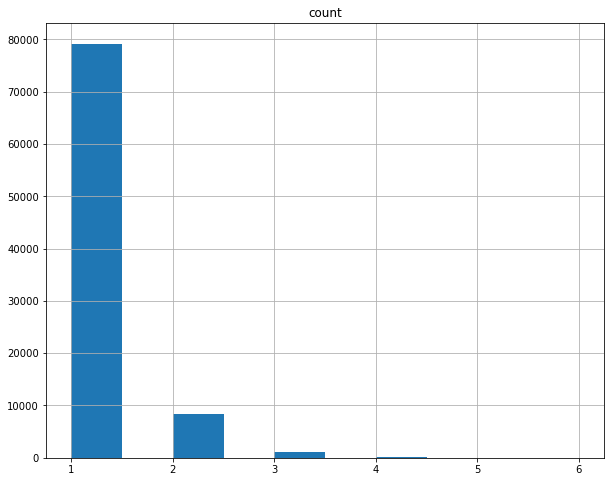

In [74]:
hotel_market[['count']].hist(figsize=(10, 8))

In [75]:
# distribution of number of booking attempts
travel.groupby('user_id')['hotel_market'].agg(num_of_hotel_market='count').reset_index().groupby('num_of_hotel_market')['user_id'].agg('count')

num_of_hotel_market
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

In [76]:
# distribution of number of booking attempts
travel.groupby('user_id')['hotel_market'].agg(num_of_hotel_market='sum').reset_index().groupby('num_of_hotel_market')['user_id'].agg('count')

num_of_hotel_market
0         4
1         1
2       672
3        13
4       345
       ... 
6081      1
6116      1
6215      1
7152      1
8982      1
Name: user_id, Length: 2955, dtype: int64

Logic checks

In [77]:
pd.crosstab(travel["hotel_market"], travel["srch_destination_id"])

srch_destination_id,4,8,9,11,14,16,19,21,24,25,...,64778,64779,64798,64871,64876,64901,64925,64937,64949,65035
hotel_market,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# travel.drop(travel[travel["srch_adults_cnt"]+travel["srch_children_cnt"]==0].index).describe()
travel.drop(travel[travel["hotel_market"] + travel["srch_destination_id"] == 0].index, inplace=True)
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [79]:
# Changing the column type to datetime using pandas
travel["srch_co"] = pd.to_datetime(travel["srch_co"])
travel["srch_ci"] = pd.to_datetime(travel["srch_ci"])
travel["date_time"] = pd.to_datetime(travel["date_time"])

# Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
travel["date"] = pd.to_datetime(travel["date_time"].apply(lambda x: x.date()))
travel[["date", "srch_ci", "srch_co"]].head()

,date,srch_ci,srch_co
0,2014-11-03,2014-12-15,2014-12-19
1,2013-03-13,2013-03-13,2013-03-14
2,2014-10-13,2015-04-03,2015-04-10
3,2013-11-05,2013-11-07,2013-11-08
4,2014-06-10,2014-08-03,2014-08-08


In [80]:
# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date
travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']]
travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']]

,srch_ci,date
5809,2014-01-05,2014-01-07
12310,2014-10-13,2014-10-14
19014,2014-02-11,2014-10-09
21780,2014-03-10,2014-09-15
22573,2014-09-12,2014-12-02
25056,2014-08-02,2014-08-23
30802,2013-09-20,2013-09-21
30929,2014-07-08,2014-07-29
35776,2014-12-01,2014-12-02
40107,2014-04-11,2014-10-26


In [81]:
travel.drop(travel[travel['srch_co'] < travel['srch_ci']].index, inplace=True)
# travel.drop(travel[travel['srch_ci'] < travel['date']].index, inplace=True)
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,9.999800e+04,99998.000000,99998.000000,99998.00000,99998.000000,99998.000000,63915.000000,9.999800e+04,99998.000000,99998.000000,...,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000
mean,1.882517e+07,9.838157,2.678174,85.99607,308.632633,27676.381298,1960.661721,6.054403e+05,0.133763,0.248135,...,0.336757,1.111752,14426.531421,2.577322,0.079932,1.487990,3.150933,81.092902,598.838627,49.860847
std,1.086191e+07,11.996155,0.749004,59.29199,208.695423,16768.576036,2228.153377,3.516118e+05,0.340399,0.431933,...,0.734454,0.451606,11036.982475,2.149273,0.271189,1.280273,1.620546,56.111558,510.956637,28.885515
min,1.012000e+03,2.000000,0.000000,0.00000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448823e+06,2.000000,3.000000,66.00000,174.000000,12949.000000,312.792100,2.987998e+05,0.000000,0.000000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881199e+07,2.000000,3.000000,66.00000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.000000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825309e+07,15.000000,3.000000,70.00000,385.000000,42328.000000,2542.359350,9.157180e+05,0.000000,0.000000,...,0.000000,1.000000,18786.000000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.00000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.000000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


Feature Engineering

In [82]:
travel[travel.srch_co.isnull() == True][['date', 'srch_ci', 'srch_co']]
# travel.drop(travel[travel.srch_ci.isnull() == True].index, inplace=True)

,date,srch_ci,srch_co
753,2014-06-22,NaT,NaT
1360,2013-04-13,NaT,NaT
1539,2014-12-28,NaT,NaT
2386,2013-07-12,NaT,NaT
3074,2013-06-01,NaT,NaT
...,...,...,...
95473,2013-07-15,NaT,NaT
95754,2013-12-25,NaT,NaT
96798,2013-06-27,NaT,NaT
98515,2013-06-20,NaT,NaT


In [83]:
#Let's create some new columns that can provide some useful info (not always necesary but help when doing clusters/decision trees)
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

# Duration is finds the length of stay by substracting the checkout day from the checkin day
travel['duration'] = travel.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [84]:
travel[['date', 'srch_ci', 'srch_co', 'duration', 'days_in_advance']].head()

,date,srch_ci,srch_co,duration,days_in_advance
0,2014-11-03,2014-12-15,2014-12-19,4.0,42.0
1,2013-03-13,2013-03-13,2013-03-14,1.0,0.0
2,2014-10-13,2015-04-03,2015-04-10,7.0,172.0
3,2013-11-05,2013-11-07,2013-11-08,1.0,2.0
4,2014-06-10,2014-08-03,2014-08-08,5.0,54.0


In [85]:
travel[travel.duration.isnull()][['date', 'srch_ci', 'srch_co', 'duration', 'days_in_advance']]

,date,srch_ci,srch_co,duration,days_in_advance
753,2014-06-22,NaT,NaT,NaN,NaN
1360,2013-04-13,NaT,NaT,NaN,NaN
1539,2014-12-28,NaT,NaT,NaN,NaN
2386,2013-07-12,NaT,NaT,NaN,NaN
3074,2013-06-01,NaT,NaT,NaN,NaN
...,...,...,...,...,...
95473,2013-07-15,NaT,NaT,NaN,NaN
95754,2013-12-25,NaT,NaT,NaN,NaN
96798,2013-06-27,NaT,NaT,NaN,NaN
98515,2013-06-20,NaT,NaT,NaN,NaN


Clustering

In [86]:
# Our selected features
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Let's create two new dataframes with our new data called hotel_data and another where we do a groupby on hotel_data on hotel_market
hotel_market_data = travel.dropna(axis=0)[features_to_explore + ['hotel_market']]
hotel_market_groups = hotel_market_data.groupby('hotel_market').mean().reset_index().dropna(axis=0)

In [87]:
hotel_market_groups.head()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,3.500000,33.500000,5540.314200,0.000000,0.000000,1.500000,0.000000,1.00000
1,1,1.000000,22.000000,4498.914300,0.000000,1.000000,2.000000,0.000000,1.00000
2,2,3.703529,78.510588,3856.395635,0.101176,0.308235,2.061176,0.296471,1.12000
3,3,2.200000,152.600000,3596.838980,0.000000,0.200000,1.400000,0.000000,1.00000
4,4,3.585799,65.792899,2876.266495,0.053254,0.254438,1.940828,0.218935,1.12426


In [88]:
hotel_market_groups.shape

(1675, 9)

Standartize our data

In [89]:
#We see the magnitude variations in our features are large (compare duration to is_mobile for example)

#We see the magnitude variations in our features are large (compare duration to is_mobile for example)

hotel_market_groups_std = hotel_market_groups.copy()
colums = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

hotel_market_groups_std[colums] = preprocessing.scale(hotel_market_groups_std[colums])

hotel_market_groups_std.head()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,0.368229,-0.318509,1.243146,-0.726961,-0.593232,-1.002829,-0.786098,-0.434525
1,1,-0.972016,-0.633892,0.819772,-0.726961,4.110061,0.065432,-0.786098,-0.434525
2,2,0.477340,0.915889,0.558561,-0.075700,0.856489,0.196137,-0.016023,0.033276
3,3,-0.328698,2.947763,0.453040,-0.726961,0.347427,-1.216481,-0.786098,-0.434525
4,4,0.414225,0.567111,0.160096,-0.384169,0.603464,-0.060990,-0.217420,0.049885


In [90]:
hotel_market_groups_std.describe()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,1675.000000,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03,1.675000e+03
mean,975.739701,2.494853e-16,2.218458e-16,8.583515e-17,-3.411864e-16,3.015830e-16,2.268169e-16,-3.924721e-16,5.145138e-16
std,594.038178,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00,1.000299e+00
min,0.000000,-1.150715e+00,-1.237234e+00,-1.008433e+00,-7.269609e-01,-5.932316e-01,-2.071090e+00,-7.860978e-01,-4.345248e-01
25%,476.500000,-6.146171e-01,-7.188469e-01,-8.068594e-01,-7.269609e-01,-5.932316e-01,-4.686987e-01,-7.860978e-01,-4.345248e-01
50%,931.000000,-3.286983e-01,-2.682308e-01,-5.142773e-01,-2.318164e-01,-5.932316e-01,6.543170e-02,-2.088811e-01,-4.345248e-01
75%,1464.500000,3.444624e-01,5.394356e-01,6.648948e-01,3.458522e-01,1.906505e-01,3.028230e-01,3.886693e-01,9.706747e-02
max,2117.000000,1.028604e+01,8.210547e+00,3.451531e+00,5.709918e+00,4.110061e+00,1.288456e+01,8.305065e+00,1.905719e+01


Implement clustering via K-means

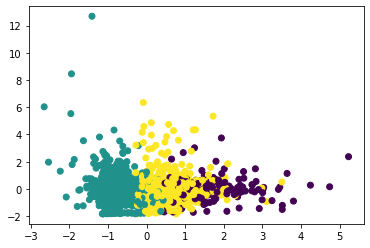

In [91]:
# Let's try arbitrarily 3 clusters 

km = cluster.KMeans(n_clusters = 3, max_iter=300, random_state=None)
hotel_market_groups_std['cluster'] = km.fit_predict(hotel_market_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

hotel_market_groups_std['x'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 0]
hotel_market_groups_std['y'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 1]
plt.scatter(hotel_market_groups_std['x'], hotel_market_groups_std['y'], c=hotel_market_groups_std['cluster'])
plt.show()

In [92]:
hotel_market_groups_std.head()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,0.368229,-0.318509,1.243146,-0.726961,-0.593232,-1.002829,-0.786098,-0.434525,2,0.417353,-1.112871
1,1,-0.972016,-0.633892,0.819772,-0.726961,4.110061,0.065432,-0.786098,-0.434525,0,1.145384,-0.483833
2,2,0.477340,0.915889,0.558561,-0.075700,0.856489,0.196137,-0.016023,0.033276,2,0.962561,0.251047
3,3,-0.328698,2.947763,0.453040,-0.726961,0.347427,-1.216481,-0.786098,-0.434525,2,1.382460,-0.832813
4,4,0.414225,0.567111,0.160096,-0.384169,0.603464,-0.060990,-0.217420,0.049885,2,0.652959,-0.006808


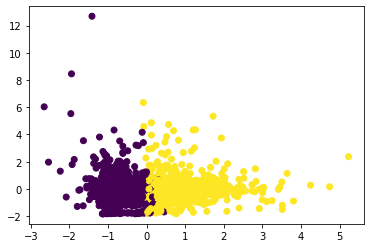

In [93]:
# Let's try with 2 clusters 

km = cluster.KMeans(n_clusters = 2, max_iter=300, random_state=None)
hotel_market_groups_std['cluster'] = km.fit_predict(hotel_market_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

hotel_market_groups_std['x'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 0]
hotel_market_groups_std['y'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 1]
plt.scatter(hotel_market_groups_std['x'], hotel_market_groups_std['y'], c=hotel_market_groups_std['cluster'])
plt.show()

In [94]:
hotel_market_groups_std.head()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,0.368229,-0.318509,1.243146,-0.726961,-0.593232,-1.002829,-0.786098,-0.434525,1,0.417353,-1.112871
1,1,-0.972016,-0.633892,0.819772,-0.726961,4.110061,0.065432,-0.786098,-0.434525,1,1.145384,-0.483833
2,2,0.477340,0.915889,0.558561,-0.075700,0.856489,0.196137,-0.016023,0.033276,1,0.962561,0.251047
3,3,-0.328698,2.947763,0.453040,-0.726961,0.347427,-1.216481,-0.786098,-0.434525,1,1.382460,-0.832813
4,4,0.414225,0.567111,0.160096,-0.384169,0.603464,-0.060990,-0.217420,0.049885,1,0.652959,-0.006808


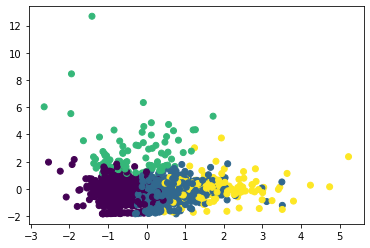

In [95]:
# Let's try with 4 clusters 

km = cluster.KMeans(n_clusters = 4, max_iter=300, random_state=None)
hotel_market_groups_std['cluster'] = km.fit_predict(hotel_market_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

hotel_market_groups_std['x'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 0]
hotel_market_groups_std['y'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 1]
plt.scatter(hotel_market_groups_std['x'], hotel_market_groups_std['y'], c=hotel_market_groups_std['cluster'])
plt.show()

In [96]:
hotel_market_groups_std.head()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,0.368229,-0.318509,1.243146,-0.726961,-0.593232,-1.002829,-0.786098,-0.434525,1,0.417353,-1.112871
1,1,-0.972016,-0.633892,0.819772,-0.726961,4.110061,0.065432,-0.786098,-0.434525,3,1.145384,-0.483833
2,2,0.477340,0.915889,0.558561,-0.075700,0.856489,0.196137,-0.016023,0.033276,1,0.962561,0.251047
3,3,-0.328698,2.947763,0.453040,-0.726961,0.347427,-1.216481,-0.786098,-0.434525,1,1.382460,-0.832813
4,4,0.414225,0.567111,0.160096,-0.384169,0.603464,-0.060990,-0.217420,0.049885,1,0.652959,-0.006808


Elbow Method

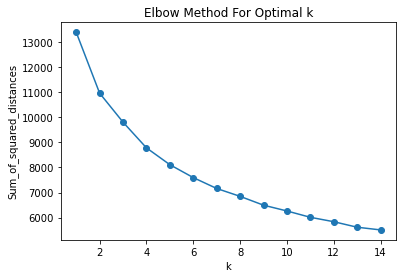

In [97]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(hotel_market_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette Coefficient

For n_clusters=2, The Silhouette Coefficient is 0.23779168023864092
For n_clusters=3, The Silhouette Coefficient is 0.2348128309043129
For n_clusters=4, The Silhouette Coefficient is 0.2412501421143509
For n_clusters=5, The Silhouette Coefficient is 0.23087176386119146
For n_clusters=6, The Silhouette Coefficient is 0.15680829327201493
For n_clusters=7, The Silhouette Coefficient is 0.17991567809253511
For n_clusters=8, The Silhouette Coefficient is 0.16195316593501408
For n_clusters=9, The Silhouette Coefficient is 0.19315557989980775
For n_clusters=10, The Silhouette Coefficient is 0.15247462070936907


Text(0, 0.5, 'Silhouette score')

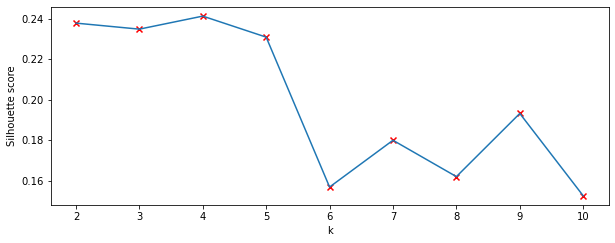

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouettes = []
ks = list(range(2, 11))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(hotel_market_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(hotel_market_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(10, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')

Now that we see a significant drop of Silhouette coefficient value with k-value of 6, we'll try to test with 6 clusters

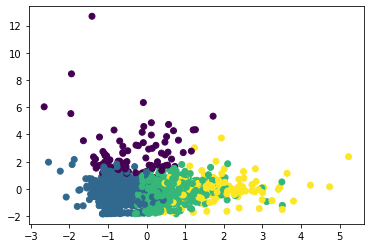

In [99]:
# Let's try with 6 clusters 

km = cluster.KMeans(n_clusters = 4, max_iter=300, random_state=None)
hotel_market_groups_std['cluster'] = km.fit_predict(hotel_market_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

hotel_market_groups_std['x'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 0]
hotel_market_groups_std['y'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 1]
plt.scatter(hotel_market_groups_std['x'], hotel_market_groups_std['y'], c=hotel_market_groups_std['cluster'])
plt.show()

b) by "srch_destination_id"

In [100]:
# Our selected features
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Let's create two new dataframes with our new data called srch_destination_id and another where we do a groupby on srch_destination_id 
srch_destination_id_data = travel.dropna(axis=0)[features_to_explore + ['srch_destination_id']]
srch_destination_id_groups = srch_destination_id_data.groupby('srch_destination_id').mean().reset_index().dropna(axis=0)

In [101]:
srch_destination_id_groups.head()

,srch_destination_id,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,4,4.000000,7.000000,1008.464600,0.000000,1.0,3.000000,0.000000,3.000000
1,8,1.444444,26.444444,402.140656,0.111111,0.0,1.888889,0.111111,1.111111
2,11,1.000000,14.000000,1166.452300,0.000000,0.0,3.000000,0.000000,1.000000
3,14,3.000000,7.000000,7875.489400,0.000000,0.0,1.000000,0.000000,1.000000
4,16,2.500000,58.000000,513.440050,0.000000,0.5,1.000000,0.000000,1.000000


In [102]:
srch_destination_id_groups.shape

(6771, 9)

Standartizing data

In [103]:
#We see the magnitude variations in our features are large (compare duration to is_mobile for example)

srch_destination_id_groups_std = srch_destination_id_groups.copy()
colums = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

srch_destination_id_groups_std[colums] = preprocessing.scale(srch_destination_id_groups_std[colums])

srch_destination_id_groups_std.head()

,srch_destination_id,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,4,0.572559,-0.751814,-0.421901,-0.478378,3.895847,1.434730,-0.564463,4.811550
1,8,-0.552547,-0.353907,-0.675971,-0.051762,-0.392603,-0.120607,-0.365246,-0.011753
2,11,-0.748217,-0.608567,-0.355699,-0.478378,-0.392603,1.434730,-0.564463,-0.295476
3,14,0.132300,-0.751814,2.455615,-0.478378,-0.392603,-1.364876,-0.564463,-0.295476
4,16,-0.087829,0.291841,-0.629333,-0.478378,1.751622,-1.364876,-0.564463,-0.295476


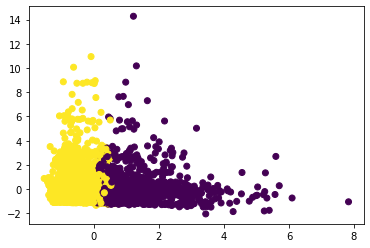

In [104]:
# Let's try with 2 clusters 
km = cluster.KMeans(n_clusters = 2, max_iter=300, random_state=None)
srch_destination_id_groups_std['cluster'] = km.fit_predict(srch_destination_id_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

srch_destination_id_groups_std['x'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore])[:, 0]
srch_destination_id_groups_std['y'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore])[:, 1]
plt.scatter(srch_destination_id_groups_std['x'], srch_destination_id_groups_std['y'], c=srch_destination_id_groups_std['cluster'])
plt.show()

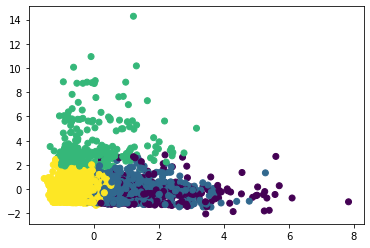

In [105]:
# Let's try with 4 clusters 
km = cluster.KMeans(n_clusters = 4, max_iter=300, random_state=None)
srch_destination_id_groups_std['cluster'] = km.fit_predict(srch_destination_id_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

srch_destination_id_groups_std['x'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore])[:, 0]
srch_destination_id_groups_std['y'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore])[:, 1]
plt.scatter(srch_destination_id_groups_std['x'], srch_destination_id_groups_std['y'], c=srch_destination_id_groups_std['cluster'])
plt.show()

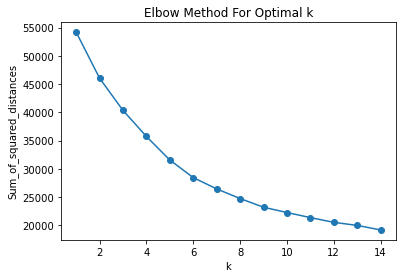

In [106]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(srch_destination_id_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette coefficient

For n_clusters=2, The Silhouette Coefficient is 0.2566345907420514
For n_clusters=3, The Silhouette Coefficient is 0.25825725849890147
For n_clusters=4, The Silhouette Coefficient is 0.26828592681168106
For n_clusters=5, The Silhouette Coefficient is 0.28454988447011254
For n_clusters=6, The Silhouette Coefficient is 0.27225851366406184
For n_clusters=7, The Silhouette Coefficient is 0.2804776796992323
For n_clusters=8, The Silhouette Coefficient is 0.28090629086356816
For n_clusters=9, The Silhouette Coefficient is 0.2845509934886956
For n_clusters=10, The Silhouette Coefficient is 0.19368838874306618


Text(0, 0.5, 'Silhouette score')

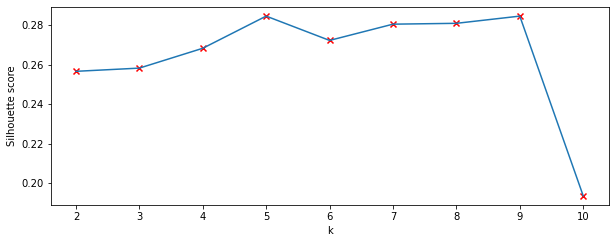

In [107]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouettes = []
ks = list(range(2, 11))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(srch_destination_id_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(srch_destination_id_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(10, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')

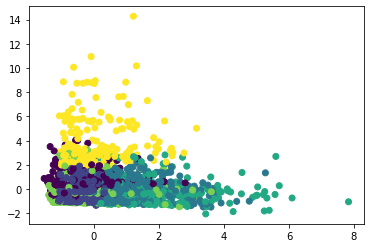

In [108]:
# Let's try with 6 clusters 
km = cluster.KMeans(n_clusters = 6, max_iter=300, random_state=None)
srch_destination_id_groups_std['cluster'] = km.fit_predict(srch_destination_id_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

srch_destination_id_groups_std['x'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore])[:, 0]
srch_destination_id_groups_std['y'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore])[:, 1]
plt.scatter(srch_destination_id_groups_std['x'], srch_destination_id_groups_std['y'], c=srch_destination_id_groups_std['cluster'])
plt.show()